###### Set-up

In [21]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

# Intro

Code taken from [ISLR Python](https://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%2010.ipynb).

Slides for this lecture can be found [here](https://docs.google.com/presentation/d/1_h-NPe8qSp9P5cxg710HBBNvfKaGxJx1-D23yt2CFT8/edit?usp=sharing)

**Generating Data**

In [22]:
X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=3, 
                  cluster_std=0.8,
                  random_state=21720 # Love ya ❤️
                 )

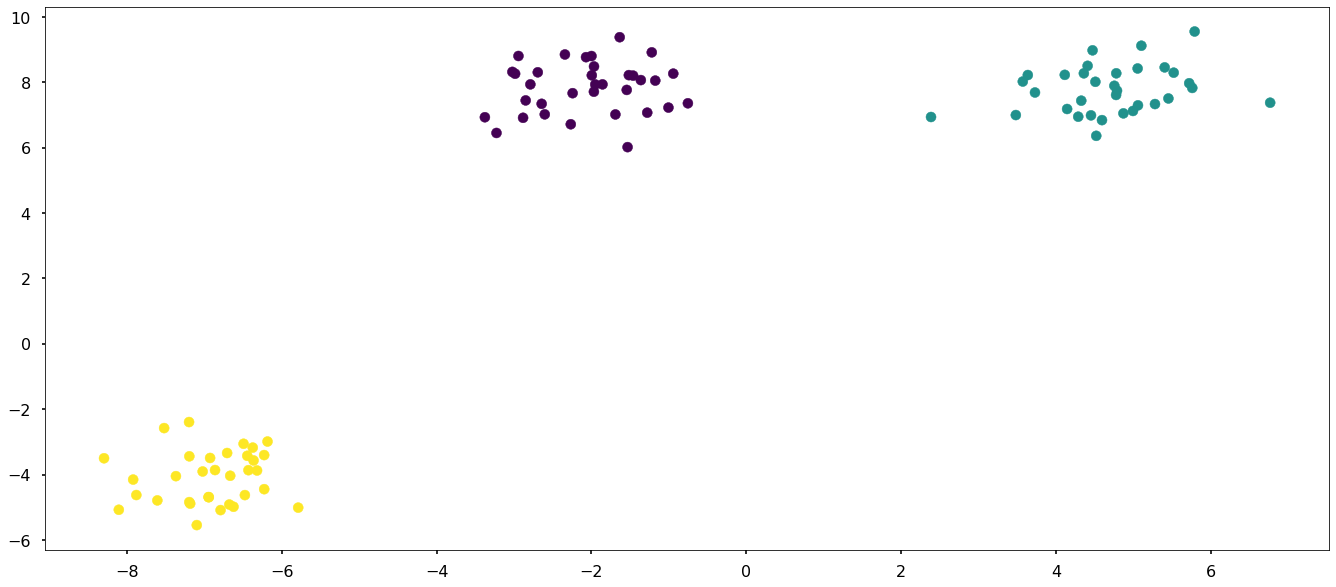

In [23]:
plt.figure(figsize=(23,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.show()

# K Means

## 2 Clusters

In [31]:
km2 = KMeans(n_clusters=2, 
             n_init=20,
             init='k-means++',
             algorithm='auto',
             random_state=21720,
             tol=0.0001,
             max_iter=1000,
             verbose=0
            )
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=21720, tol=0.0001, verbose=0)

In [29]:
km2.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [27]:
pd.Series(km2.labels_).value_counts(normalize=True)

1    0.67
0    0.33
dtype: float64

## 3 Clusters

In [7]:
km3 = KMeans(n_clusters=3,
             n_init=20,
             random_state=21720
            )
km3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=21720, tol=0.0001, verbose=0)

In [8]:
km3.labels_

array([0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2,
       2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0], dtype=int32)

In [9]:
pd.Series(km3.labels_).value_counts(normalize=True)

2    0.34
1    0.33
0    0.33
dtype: float64

In [10]:
km3.cluster_centers_

array([[-6.90836349, -4.07067971],
       [ 4.69052665,  7.77030388],
       [-2.05264982,  7.83263264]])

In [11]:
# Sum of distances of samples to their closest cluster center.
km3.inertia_

107.96524480953492

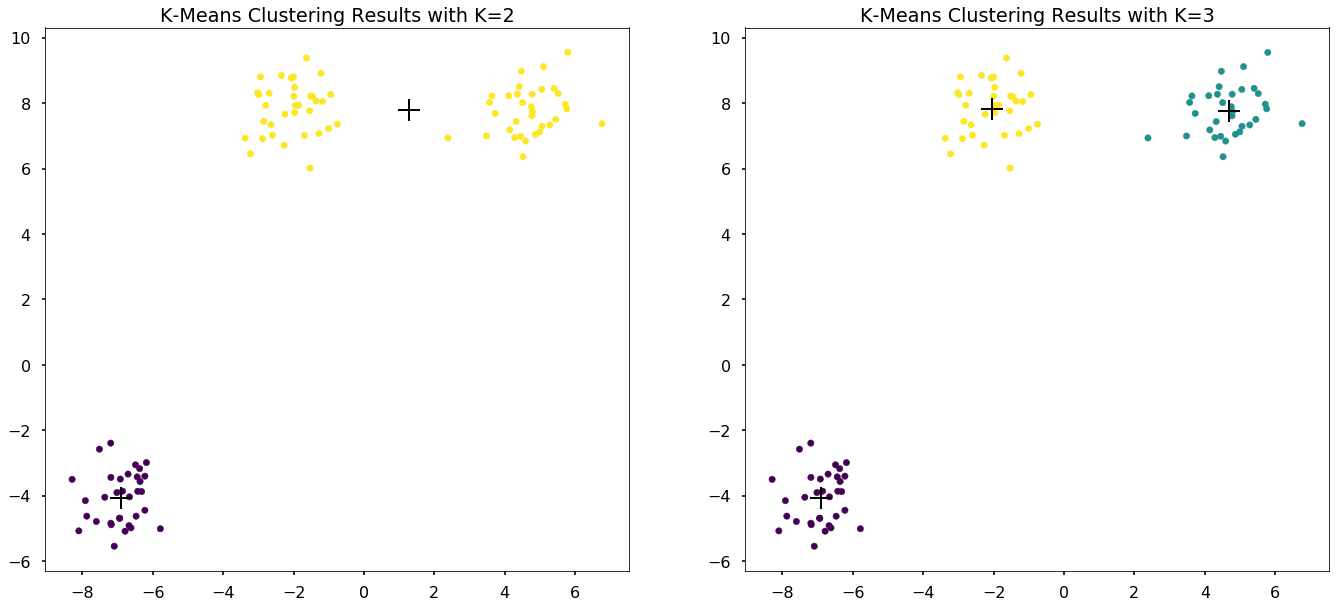

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(23,10))

ax1.scatter(X[:,0], X[:,1], s=40, c=km2.labels_) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=500, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km3.labels_) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], marker='+', s=500, c='k', linewidth=2)
plt.show()

## 4 Clusters

In [13]:
km4 = KMeans(n_clusters=4,
             n_init=20,
             random_state=21720,
             tol=0.00001
            )
km4.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=21720, tol=1e-05, verbose=0)

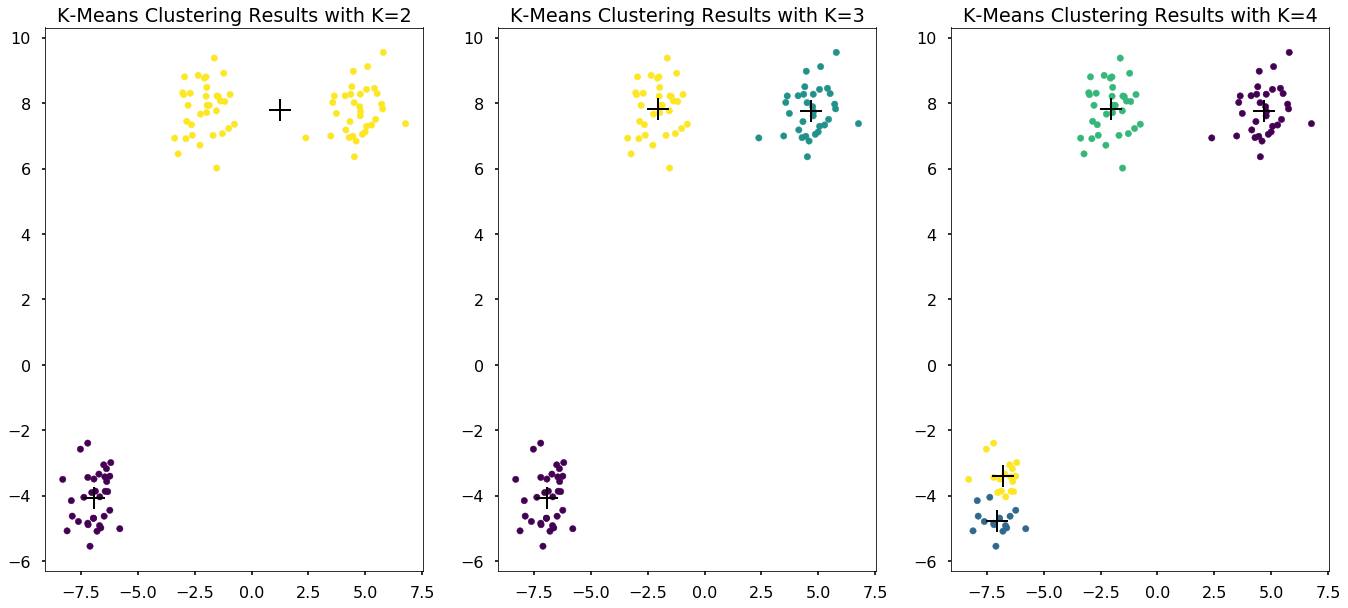

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(23,10))

ax1.scatter(X[:,0], X[:,1], s=40, c=km2.labels_) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=500, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km3.labels_) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], marker='+', s=500, c='k', linewidth=2)

ax3.scatter(X[:,0], X[:,1], s=40, c=km4.labels_) 
ax3.set_title('K-Means Clustering Results with K=4')
ax3.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], marker='+', s=500, c='k', linewidth=2)

plt.show()

## ? Clusters

If you don't know the number of final clusters that you are trying to find, you shoud use `Hierarchical Clustering`. However, let's said that you are forced to  use `K Means` without knowing `k`:

**In order to adress this task, we will use the Elbow method:**

In [15]:
# Preprocessing is needed. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create empty list for silhouette scores
silhouette_scores = []

# Create empty list for inertia scores
inertia_scores = []

# Range of k values to try
k_values = range(2, 10)

for k in k_values:
    km =  KMeans(n_clusters=k,
                 n_init=20,
                 random_state=21720,
                 tol=0.00001
                )
    km.fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_, metric='euclidean', random_state=21720)
    silhouette_scores.append(score)
    inertia_scores.append(km.inertia_)

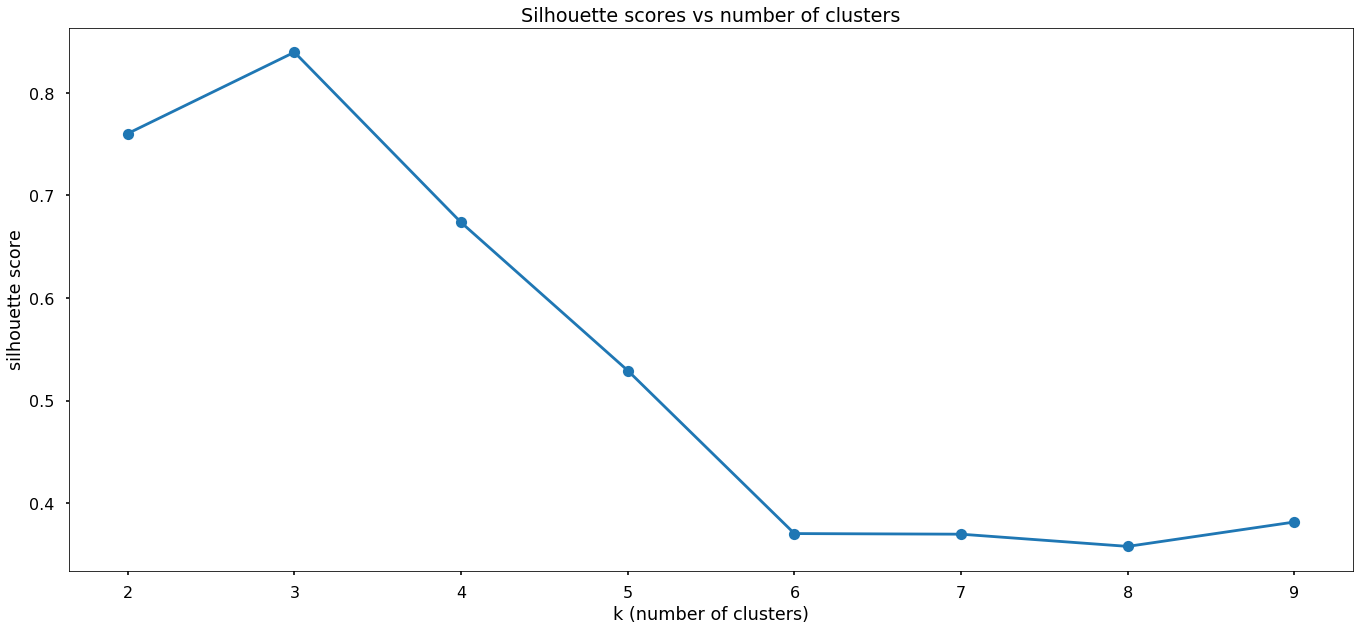

In [16]:
plt.figure(figsize=(23,10))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette scores vs number of clusters')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')
plt.show()

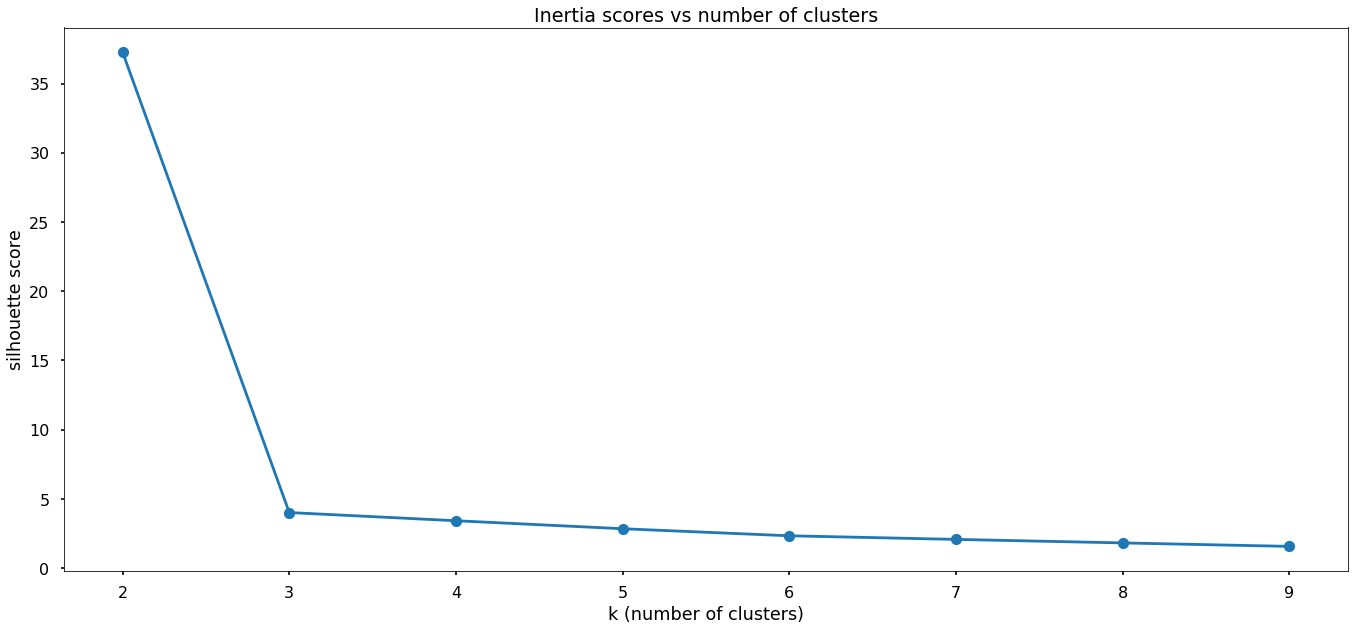

In [20]:
plt.figure(figsize=(23,10))
plt.plot(k_values, inertia_scores, marker='o')
plt.title('Inertia scores vs number of clusters')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')
plt.show()

k = 3

There is a clear "elbow" in the `silhouette score` graph at 3 clusters, and it looks like there is an elbow at 3 clusters as well in the second graph where we're using `Within Cluster Sum of Squares`, also known as `Inertia`, as our evaluation metric. These evidences suggest that there are 3 clusters as indeed we know that they are because we generated the data setting the number of clusters to 3.